## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_XLE
data_XLE.head(2)

,Adj Close
Date,
2009-06-01,41.031338
2009-06-08,42.133686


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e671208>],
      dtype=object)

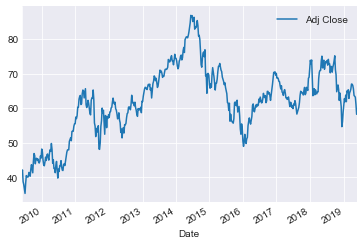

In [3]:
data_XLE.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_XLE)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.11025261],
       [0.1316555 ]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [10]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

W0917 00:26:15.174991 4688795072 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:26:15.177094 4688795072 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:26:15.183223 4688795072 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 00:26:15.625236 4688795072 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:26:15.954271 4688795072 deprecation.py:323] From //anaconda3/li

Epoch 1/2000
311/311 [==============================] - 5s 16ms/step - loss: 0.2931
Epoch 2/2000
311/311 [==============================] - 0s 129us/step - loss: 0.2654
Epoch 3/2000
311/311 [==============================] - 0s 149us/step - loss: 0.2396
Epoch 4/2000
311/311 [==============================] - 0s 150us/step - loss: 0.2151
Epoch 5/2000
311/311 [==============================] - 0s 153us/step - loss: 0.1920
Epoch 6/2000
311/311 [==============================] - 0s 156us/step - loss: 0.1704
Epoch 7/2000
311/311 [==============================] - 0s 149us/step - loss: 0.1500
Epoch 8/2000
311/311 [==============================] - 0s 138us/step - loss: 0.1310
Epoch 9/2000
311/311 [==============================] - 0s 151us/step - loss: 0.1134
Epoch 10/2000
311/311 [==============================] - 0s 160us/step - loss: 0.0973
Epoch 11/2000
311/311 [==============================] - 0s 163us/step - loss: 0.0827
Epoch 12/2000
311/311 [==============================] - 0s 163u

311/311 [==============================] - 0s 148us/step - loss: 0.0059
Epoch 97/2000
311/311 [==============================] - 0s 159us/step - loss: 0.0057
Epoch 98/2000
311/311 [==============================] - 0s 153us/step - loss: 0.0056
Epoch 99/2000
311/311 [==============================] - 0s 149us/step - loss: 0.0054
Epoch 100/2000
311/311 [==============================] - 0s 142us/step - loss: 0.0053
Epoch 101/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0051
Epoch 102/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0050
Epoch 103/2000
311/311 [==============================] - 0s 143us/step - loss: 0.0048
Epoch 104/2000
311/311 [==============================] - 0s 140us/step - loss: 0.0047
Epoch 105/2000
311/311 [==============================] - 0s 138us/step - loss: 0.0046
Epoch 106/2000
311/311 [==============================] - 0s 138us/step - loss: 0.0044
Epoch 107/2000
311/311 [==============================] - 0s 

311/311 [==============================] - 0s 139us/step - loss: 0.0012
Epoch 191/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 192/2000
311/311 [==============================] - 0s 142us/step - loss: 0.0012
Epoch 193/2000
311/311 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 194/2000
311/311 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 195/2000
311/311 [==============================] - 0s 150us/step - loss: 0.0012
Epoch 196/2000
311/311 [==============================] - 0s 144us/step - loss: 0.0012
Epoch 197/2000
311/311 [==============================] - 0s 137us/step - loss: 0.0012
Epoch 198/2000
311/311 [==============================] - 0s 157us/step - loss: 0.0012
Epoch 199/2000
311/311 [==============================] - 0s 163us/step - loss: 0.0012
Epoch 200/2000
311/311 [==============================] - 0s 157us/step - loss: 0.0012
Epoch 201/2000
311/311 [==============================] - 

311/311 [==============================] - 0s 167us/step - loss: 0.0012
Epoch 285/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 286/2000
311/311 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 287/2000
311/311 [==============================] - 0s 154us/step - loss: 0.0012
Epoch 288/2000
311/311 [==============================] - 0s 148us/step - loss: 0.0012
Epoch 289/2000
311/311 [==============================] - 0s 147us/step - loss: 0.0012
Epoch 290/2000
311/311 [==============================] - 0s 142us/step - loss: 0.0012
Epoch 291/2000
311/311 [==============================] - 0s 148us/step - loss: 0.0012
Epoch 292/2000
311/311 [==============================] - 0s 170us/step - loss: 0.0012
Epoch 293/2000
311/311 [==============================] - 0s 175us/step - loss: 0.0012
Epoch 294/2000
311/311 [==============================] - 0s 165us/step - loss: 0.0012
Epoch 295/2000
311/311 [==============================] - 

311/311 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 379/2000
311/311 [==============================] - 0s 139us/step - loss: 0.0012
Epoch 380/2000
311/311 [==============================] - 0s 178us/step - loss: 0.0012
Epoch 381/2000
311/311 [==============================] - 0s 175us/step - loss: 0.0012
Epoch 382/2000
311/311 [==============================] - 0s 156us/step - loss: 0.0012
Epoch 383/2000
311/311 [==============================] - 0s 151us/step - loss: 0.0012
Epoch 384/2000
311/311 [==============================] - 0s 150us/step - loss: 0.0012
Epoch 385/2000
311/311 [==============================] - 0s 155us/step - loss: 0.0012
Epoch 386/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 387/2000
311/311 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 388/2000
311/311 [==============================] - 0s 160us/step - loss: 0.0012
Epoch 389/2000
311/311 [==============================] - 

311/311 [==============================] - 0s 173us/step - loss: 0.0012
Epoch 473/2000
311/311 [==============================] - 0s 162us/step - loss: 0.0012
Epoch 474/2000
311/311 [==============================] - 0s 167us/step - loss: 0.0012
Epoch 475/2000
311/311 [==============================] - 0s 156us/step - loss: 0.0012
Epoch 476/2000
311/311 [==============================] - 0s 168us/step - loss: 0.0012
Epoch 477/2000
311/311 [==============================] - 0s 172us/step - loss: 0.0012
Epoch 478/2000
311/311 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 479/2000
311/311 [==============================] - 0s 162us/step - loss: 0.0012
Epoch 480/2000
311/311 [==============================] - 0s 165us/step - loss: 0.0012
Epoch 481/2000
311/311 [==============================] - 0s 159us/step - loss: 0.0012
Epoch 482/2000
311/311 [==============================] - 0s 167us/step - loss: 0.0012
Epoch 483/2000
311/311 [==============================] - 

311/311 [==============================] - 0s 150us/step - loss: 0.0012
Epoch 567/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 568/2000
311/311 [==============================] - 0s 148us/step - loss: 0.0012
Epoch 569/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 570/2000
311/311 [==============================] - 0s 149us/step - loss: 0.0012
Epoch 571/2000
311/311 [==============================] - 0s 149us/step - loss: 0.0012
Epoch 572/2000
311/311 [==============================] - 0s 161us/step - loss: 0.0012
Epoch 573/2000
311/311 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 574/2000
311/311 [==============================] - 0s 160us/step - loss: 0.0012
Epoch 575/2000
311/311 [==============================] - 0s 148us/step - loss: 0.0012
Epoch 576/2000
311/311 [==============================] - 0s 141us/step - loss: 0.0012
Epoch 577/2000
311/311 [==============================] - 

311/311 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 661/2000
311/311 [==============================] - 0s 154us/step - loss: 0.0012
Epoch 662/2000
311/311 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 663/2000
311/311 [==============================] - 0s 149us/step - loss: 0.0012
Epoch 664/2000
311/311 [==============================] - 0s 148us/step - loss: 0.0012
Epoch 665/2000
311/311 [==============================] - 0s 144us/step - loss: 0.0012
Epoch 666/2000
311/311 [==============================] - 0s 146us/step - loss: 0.0012
Epoch 667/2000
311/311 [==============================] - 0s 145us/step - loss: 0.0012
Epoch 668/2000
311/311 [==============================] - 0s 149us/step - loss: 0.0012
Epoch 669/2000
311/311 [==============================] - 0s 150us/step - loss: 0.0012
Epoch 670/2000
311/311 [==============================] - 0s 146us/step - loss: 0.0012
Epoch 671/2000
311/311 [==============================] - 

311/311 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 755/2000
311/311 [==============================] - 0s 91us/step - loss: 0.0012
Epoch 756/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 757/2000
311/311 [==============================] - 0s 90us/step - loss: 0.0012
Epoch 758/2000
311/311 [==============================] - 0s 91us/step - loss: 0.0012
Epoch 759/2000
311/311 [==============================] - 0s 87us/step - loss: 0.0012
Epoch 760/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 761/2000
311/311 [==============================] - 0s 95us/step - loss: 0.0012
Epoch 762/2000
311/311 [==============================] - 0s 91us/step - loss: 0.0012
Epoch 763/2000
311/311 [==============================] - 0s 90us/step - loss: 0.0012
Epoch 764/2000
311/311 [==============================] - 0s 91us/step - loss: 0.0012
Epoch 765/2000
311/311 [==============================] - 0s 93us/ste

311/311 [==============================] - 0s 114us/step - loss: 0.0012
Epoch 850/2000
311/311 [==============================] - 0s 103us/step - loss: 0.0012
Epoch 851/2000
311/311 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 852/2000
311/311 [==============================] - 0s 94us/step - loss: 0.0012
Epoch 853/2000
311/311 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 854/2000
311/311 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 855/2000
311/311 [==============================] - 0s 101us/step - loss: 0.0012
Epoch 856/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 857/2000
311/311 [==============================] - 0s 103us/step - loss: 0.0012
Epoch 858/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 859/2000
311/311 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 860/2000
311/311 [==============================] - 0s 9

311/311 [==============================] - 0s 89us/step - loss: 0.0012
Epoch 945/2000
311/311 [==============================] - 0s 90us/step - loss: 0.0012
Epoch 946/2000
311/311 [==============================] - 0s 92us/step - loss: 0.0012
Epoch 947/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 948/2000
311/311 [==============================] - 0s 92us/step - loss: 0.0012
Epoch 949/2000
311/311 [==============================] - 0s 92us/step - loss: 0.0012
Epoch 950/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 951/2000
311/311 [==============================] - 0s 91us/step - loss: 0.0012
Epoch 952/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 953/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 954/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 955/2000
311/311 [==============================] - 0s 100us/st

311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1039/2000
311/311 [==============================] - 0s 114us/step - loss: 0.0012
Epoch 1040/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1041/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1042/2000
311/311 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 1043/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1044/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1045/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1046/2000
311/311 [==============================] - 0s 97us/step - loss: 0.0012
Epoch 1047/2000
311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1048/2000
311/311 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 1049/2000
311/311 [=========================

311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1132/2000
311/311 [==============================] - 0s 110us/step - loss: 0.0012
Epoch 1133/2000
311/311 [==============================] - 0s 97us/step - loss: 0.0012
Epoch 1134/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1135/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1136/2000
311/311 [==============================] - 0s 101us/step - loss: 0.0012
Epoch 1137/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1138/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1139/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1140/2000
311/311 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 1141/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1142/2000
311/311 [=========================

311/311 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 1225/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1226/2000
311/311 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 1227/2000
311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1228/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1229/2000
311/311 [==============================] - 0s 110us/step - loss: 0.0012
Epoch 1230/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1231/2000
311/311 [==============================] - 0s 112us/step - loss: 0.0012
Epoch 1232/2000
311/311 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 1233/2000
311/311 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 1234/2000
311/311 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 1235/2000
311/311 [==========================

311/311 [==============================] - 0s 92us/step - loss: 0.0012
Epoch 1318/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 1319/2000
311/311 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 1320/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1321/2000
311/311 [==============================] - 0s 113us/step - loss: 0.0012
Epoch 1322/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1323/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1324/2000
311/311 [==============================] - 0s 114us/step - loss: 0.0012
Epoch 1325/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1326/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1327/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1328/2000
311/311 [==========================

311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1411/2000
311/311 [==============================] - 0s 112us/step - loss: 0.0012
Epoch 1412/2000
311/311 [==============================] - 0s 110us/step - loss: 0.0012
Epoch 1413/2000
311/311 [==============================] - 0s 108us/step - loss: 0.0012
Epoch 1414/2000
311/311 [==============================] - 0s 110us/step - loss: 0.0012
Epoch 1415/2000
311/311 [==============================] - 0s 111us/step - loss: 0.0012
Epoch 1416/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1417/2000
311/311 [==============================] - 0s 97us/step - loss: 0.0012
Epoch 1418/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1419/2000
311/311 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 1420/2000
311/311 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 1421/2000
311/311 [========================

311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1504/2000
311/311 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 1505/2000
311/311 [==============================] - 0s 112us/step - loss: 0.0012
Epoch 1506/2000
311/311 [==============================] - 0s 111us/step - loss: 0.0012
Epoch 1507/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1508/2000
311/311 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 1509/2000
311/311 [==============================] - 0s 111us/step - loss: 0.0012
Epoch 1510/2000
311/311 [==============================] - 0s 106us/step - loss: 0.0012
Epoch 1511/2000
311/311 [==============================] - 0s 97us/step - loss: 0.0012
Epoch 1512/2000
311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1513/2000
311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1514/2000
311/311 [========================

311/311 [==============================] - 0s 94us/step - loss: 0.0012
Epoch 1597/2000
311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 1598/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1599/2000
311/311 [==============================] - 0s 106us/step - loss: 0.0012
Epoch 1600/2000
311/311 [==============================] - 0s 112us/step - loss: 0.0012
Epoch 1601/2000
311/311 [==============================] - 0s 110us/step - loss: 0.0012
Epoch 1602/2000
311/311 [==============================] - 0s 108us/step - loss: 0.0012
Epoch 1603/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1604/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1605/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1606/2000
311/311 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 1607/2000
311/311 [=========================

311/311 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 1690/2000
311/311 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 1691/2000
311/311 [==============================] - 0s 110us/step - loss: 0.0012
Epoch 1692/2000
311/311 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 1693/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1694/2000
311/311 [==============================] - 0s 106us/step - loss: 0.0012
Epoch 1695/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1696/2000
311/311 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 1697/2000
311/311 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 1698/2000
311/311 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 1699/2000
311/311 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1700/2000
311/311 [============================

311/311 [==============================] - 0s 92us/step - loss: 0.0012
Epoch 1783/2000
311/311 [==============================] - 0s 97us/step - loss: 0.0012
Epoch 1784/2000
311/311 [==============================] - 0s 97us/step - loss: 0.0012
Epoch 1785/2000
311/311 [==============================] - 0s 108us/step - loss: 0.0012
Epoch 1786/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1787/2000
311/311 [==============================] - 0s 109us/step - loss: 0.0012
Epoch 1788/2000
311/311 [==============================] - 0s 106us/step - loss: 0.0012
Epoch 1789/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1790/2000
311/311 [==============================] - ETA: 0s - loss: 9.4564e-0 - 0s 104us/step - loss: 0.0012
Epoch 1791/2000
311/311 [==============================] - 0s 103us/step - loss: 0.0012
Epoch 1792/2000
311/311 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 1793/2000
311/311 

311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1876/2000
311/311 [==============================] - 0s 103us/step - loss: 0.0012
Epoch 1877/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1878/2000
311/311 [==============================] - 0s 112us/step - loss: 0.0012
Epoch 1879/2000
311/311 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 1880/2000
311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1881/2000
311/311 [==============================] - 0s 103us/step - loss: 0.0012
Epoch 1882/2000
311/311 [==============================] - 0s 108us/step - loss: 0.0012
Epoch 1883/2000
311/311 [==============================] - 0s 101us/step - loss: 0.0012
Epoch 1884/2000
311/311 [==============================] - 0s 106us/step - loss: 0.0012
Epoch 1885/2000
311/311 [==============================] - 0s 106us/step - loss: 0.0012
Epoch 1886/2000
311/311 [=======================

311/311 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 1969/2000
311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1970/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1971/2000
311/311 [==============================] - 0s 108us/step - loss: 0.0012
Epoch 1972/2000
311/311 [==============================] - 0s 108us/step - loss: 0.0012
Epoch 1973/2000
311/311 [==============================] - 0s 115us/step - loss: 0.0012
Epoch 1974/2000
311/311 [==============================] - 0s 106us/step - loss: 0.0012
Epoch 1975/2000
311/311 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 1976/2000
311/311 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 1977/2000
311/311 [==============================] - 0s 95us/step - loss: 0.0012
Epoch 1978/2000
311/311 [==============================] - 0s 94us/step - loss: 0.0012
Epoch 1979/2000
311/311 [==========================

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [11]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 1.77 RMSE
Testing score: 1.73 RMSE


### Plotting and comparing original data, predictions, forecasts

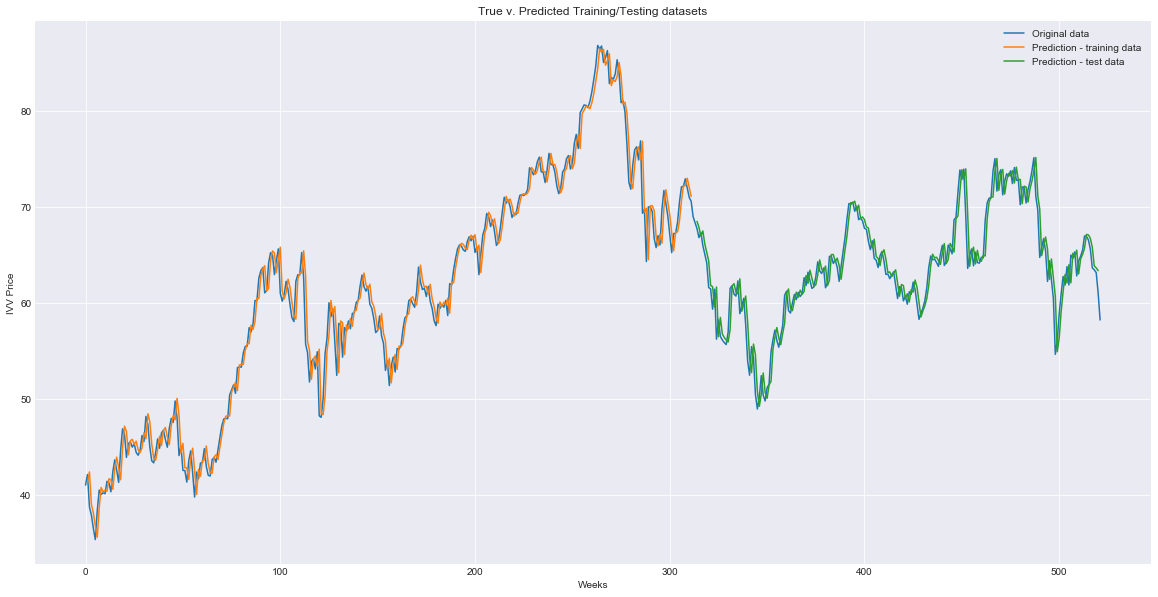

In [12]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('IVV Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [13]:
LSTM_pred_XLE = pd.DataFrame(test_pred)
%store LSTM_pred_XLE

Stored 'LSTM_pred_XLE' (DataFrame)
